In [1]:
!pwd

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
sys.executable

/c/Users/shingo/jupyter_notebook/stock_work/03.stock_repo/pair_trade


'C:\\Users\\shingo\\Anaconda3\\envs\\stock\\python.exe'

# ペアトレードに向いている銘柄を探索

<br>

### ペアトレードに向いている銘柄探索の具体的な処理
1. 各銘柄の累積収益率計算
2. 2銘柄について、一方の累積収益率を説明変数としてもう一方の累積収益率を予測する線形回帰モデル作成
3. 線形回帰モデルの予測と正解ラベルとの残差に対してADF検定を実施し、p値の距離行列を作成
4. p値の距離行列からクラスタリング
5. p値<0.1のペアについて収益率など可視化

<br>

#### 正解ラベルとの残差グラフがy=0を周期的に行ったり来たりしていたら、定常過程で動いてるといえるので、最適なペアと言える
- いくつかのテーマで試したが良さそうなペア見つからず。。。


In [2]:
import os
import joblib

#import sys
#sys.path.append(r'')
import pair_trade

In [3]:
# 出力ディレクトリ
output_dir = r'output'
os.makedirs(output_dir, exist_ok=True)

# データ元
data_dir = r'D:\DB_Browser_for_SQLite\csvs\kabuoji3'

## 自動車関連が株式テーマの銘柄について
- https://kabutan.jp/themes/?theme=%E8%87%AA%E5%8B%95%E8%BB%8A

In [4]:
# 自動車関連が株式テーマの銘柄一覧
automotive_names = ['イーソル', '日産自', 'いすゞ', 'トヨタ', '日野自', '三菱自', 'マツダ', 'ホンダ', 'スズキ', 'ＳＵＢＡＲＵ']
automotive_codes = [4420, 7201, 7202, 7203, 7205, 7211, 7261, 7267, 7269, 7270]

10it [00:01,  6.14it/s]


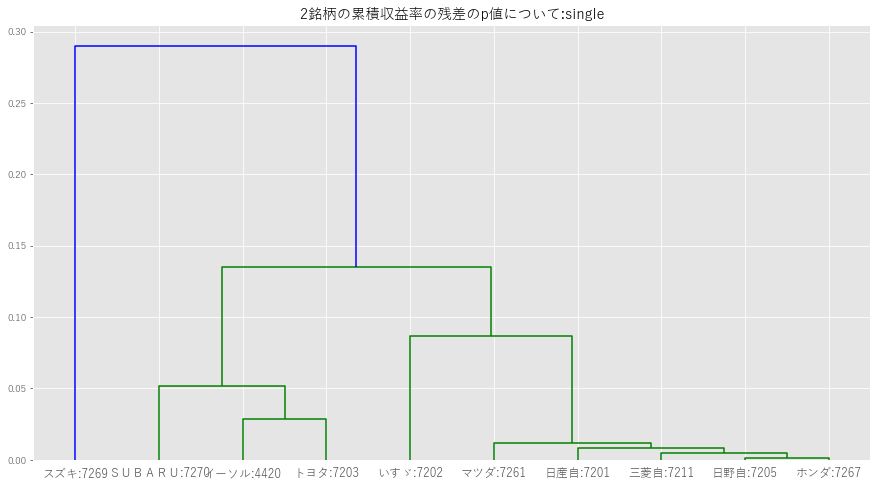

df_pair:
    index1  index2  distance  date_count index1_name index2_name
0     4.0     7.0  0.001055         2.0    日野自:7205    ホンダ:7267


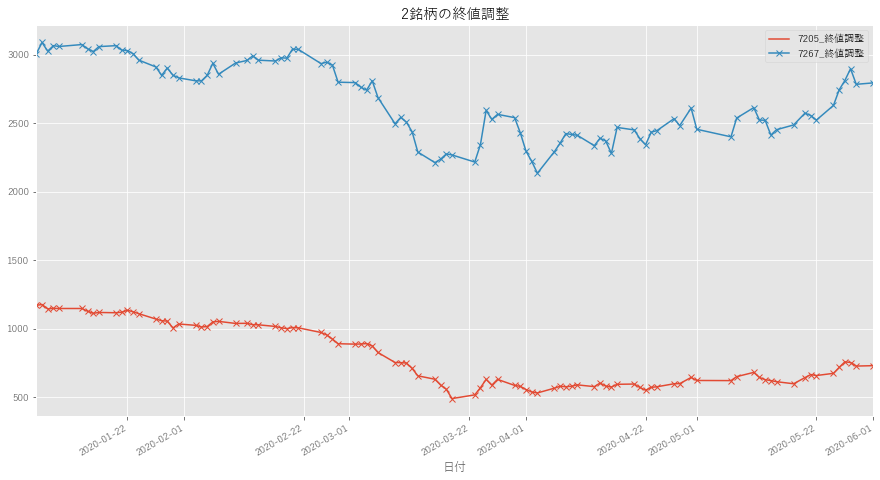

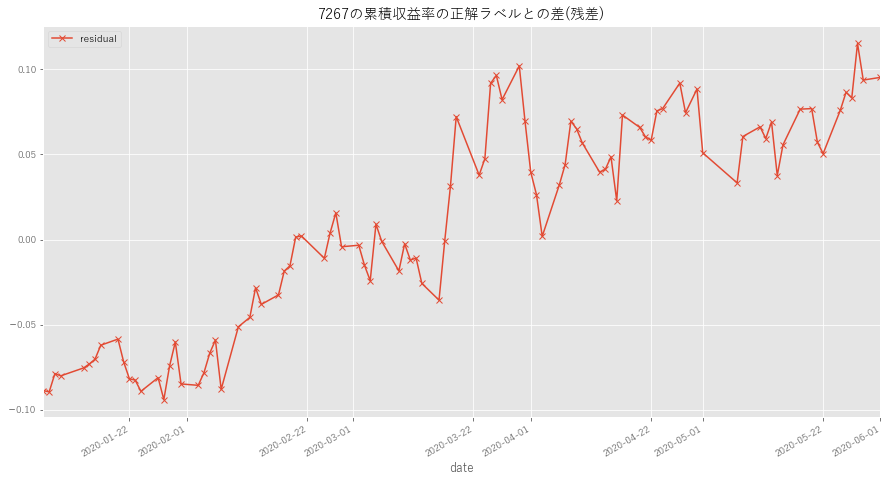

In [5]:
pair_trade.search_pair_trade(data_dir, automotive_codes, automotive_names, output_dir, 
                             p_threshold=0.01, 
                             train_start_date='2015-01-01')

## 鉄道関連が株式テーマの銘柄について
- https://kabutan.jp/themes/?theme=%E9%89%84%E9%81%93%E9%96%A2%E9%80%A3&market=0&capitalization=-1&stc=&stm=0&page=1

77it [01:40,  1.30s/it]


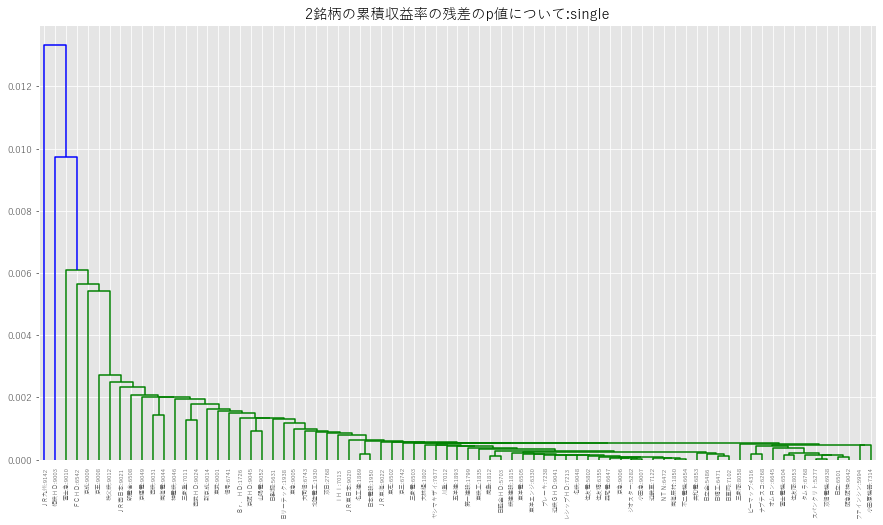

df_pair:
     index1  index2  distance  date_count  index1_name index2_name
0      6.0    35.0  0.000006         2.0    南海辰村:1850   不二電機:6654
1     15.0    57.0  0.000006         2.0   ジオスター:5282    小田急:9007
2     14.0    41.0  0.000007         2.0  スパンクリト:5277   双信電機:6938
7     26.0    69.0  0.000075         2.0      日立:6501   阪急阪神:9042
10    24.0    45.0  0.000105         2.0     日精工:6471    日車両:7102
12     3.0    18.0  0.000126         2.0      鹿島:1812  日軽金ＨＤ:5703
16    29.0    51.0  0.000152         2.0    富士電機:6504    住友商:8053
23     7.0    11.0  0.000171         2.0     名工建:1869   日本電設:1950
24    13.0    21.0  0.000172         2.0   ビーマップ:4316  ナブテスコ:6268
37    20.0    49.0  0.000459         2.0  ファインシン:5994  小田原機器:7314
52    71.0    75.0  0.000915         2.0    京阪ＨＤ:9045    山陽電:9052
55    42.0    66.0  0.001278         2.0     三菱重:7011   西武ＨＤ:9024
59    67.0    70.0  0.001436         2.0      西鉄:9031    南海電:9044


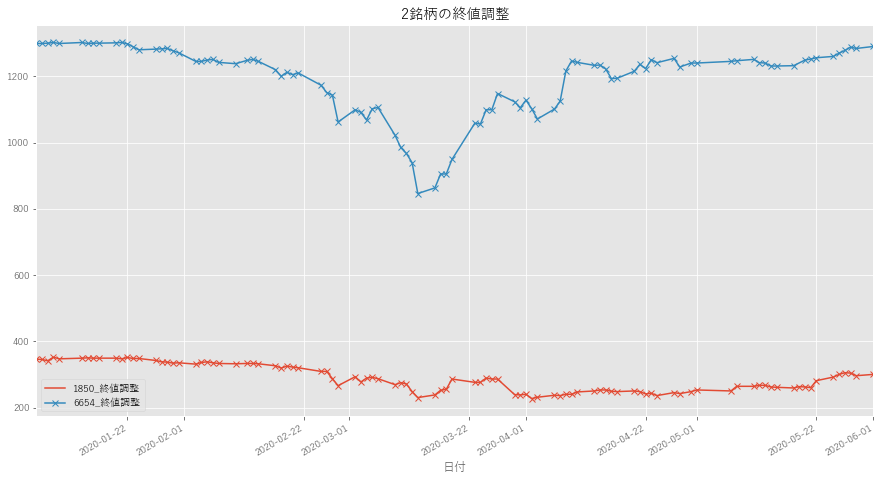

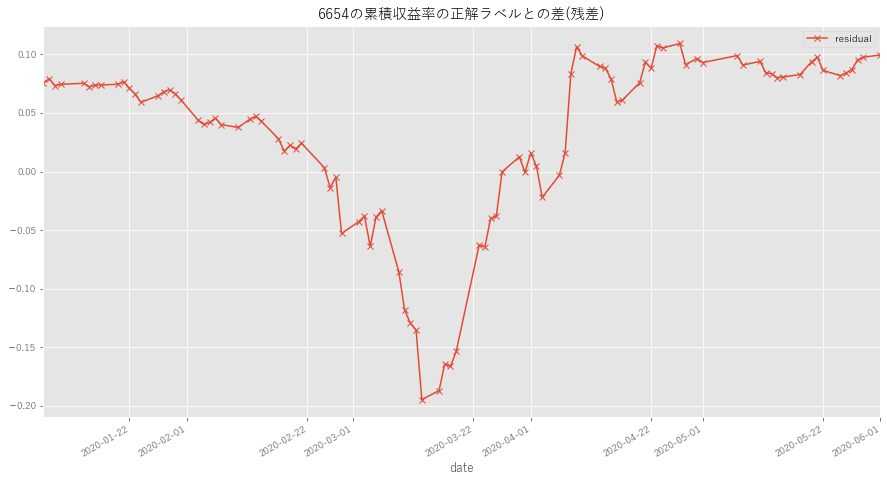

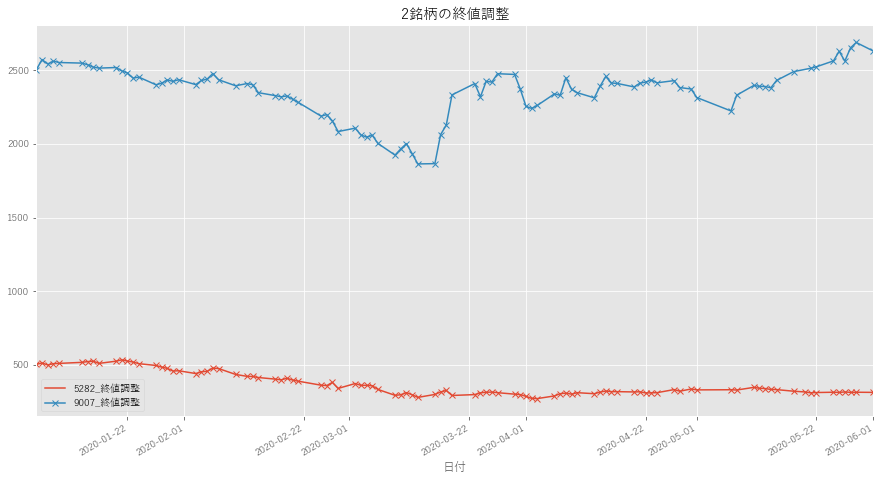

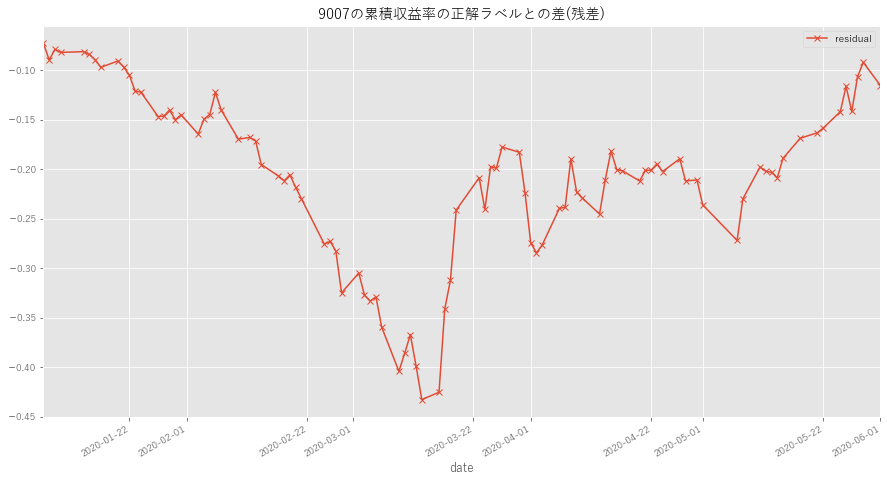

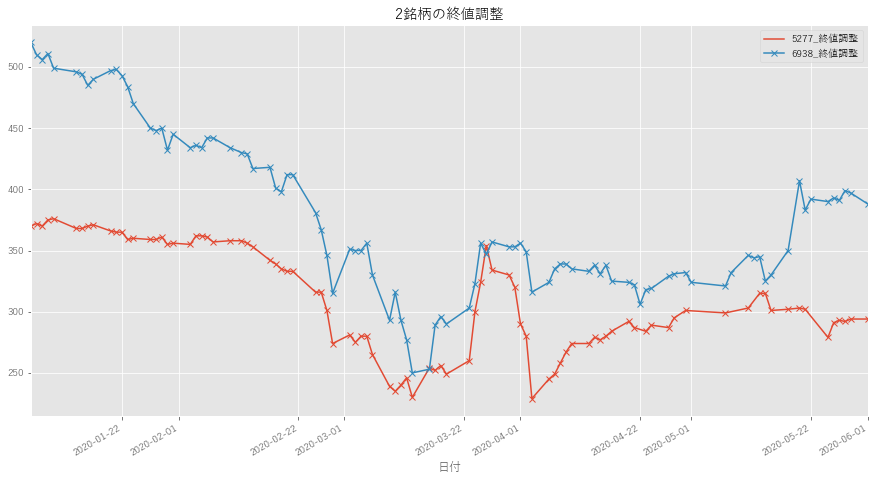

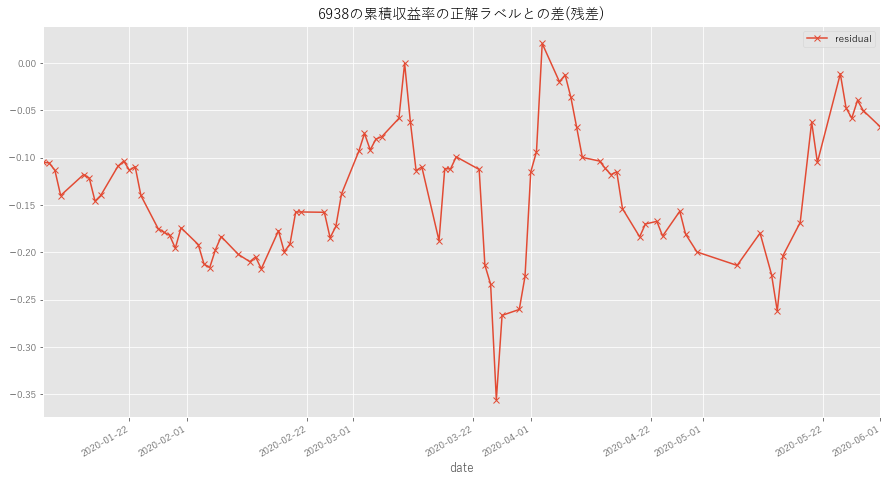

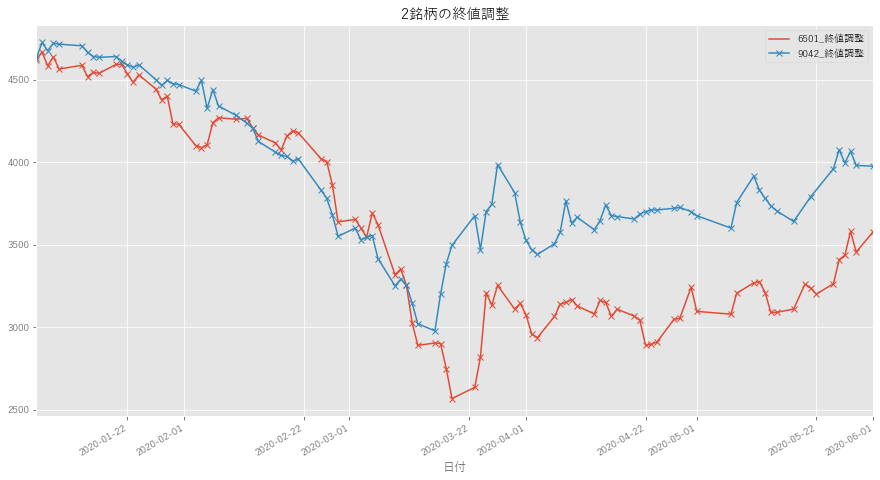

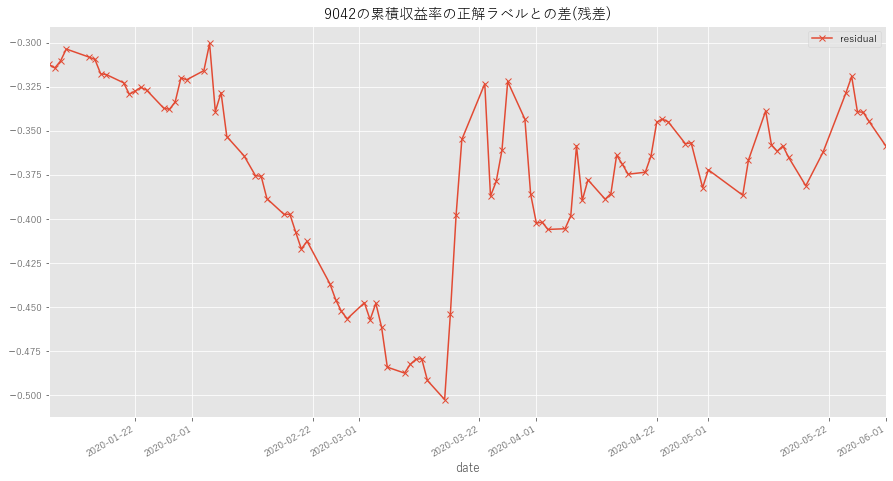

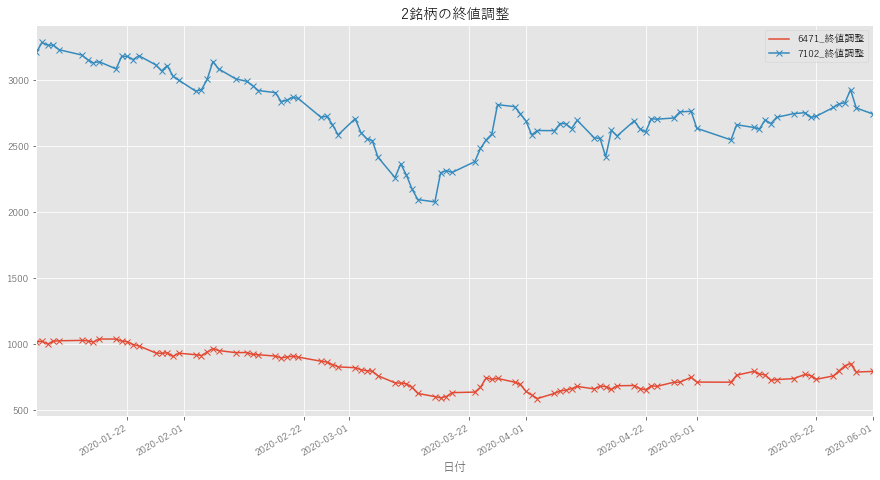

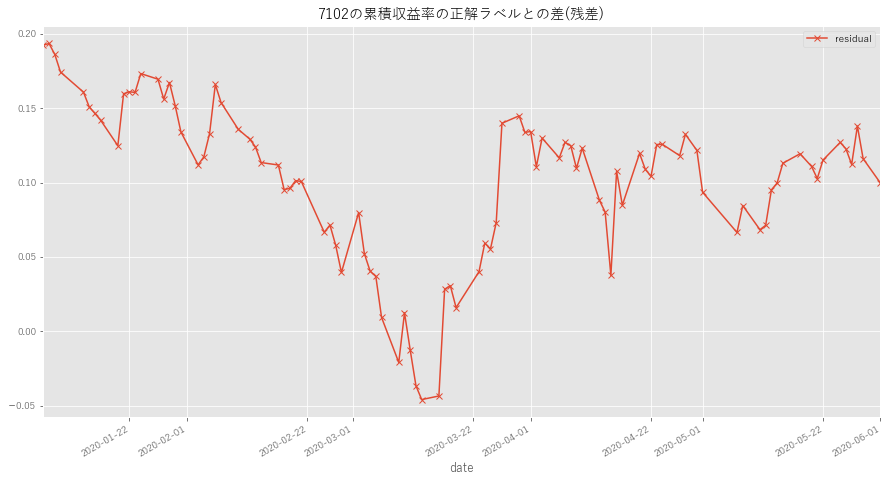

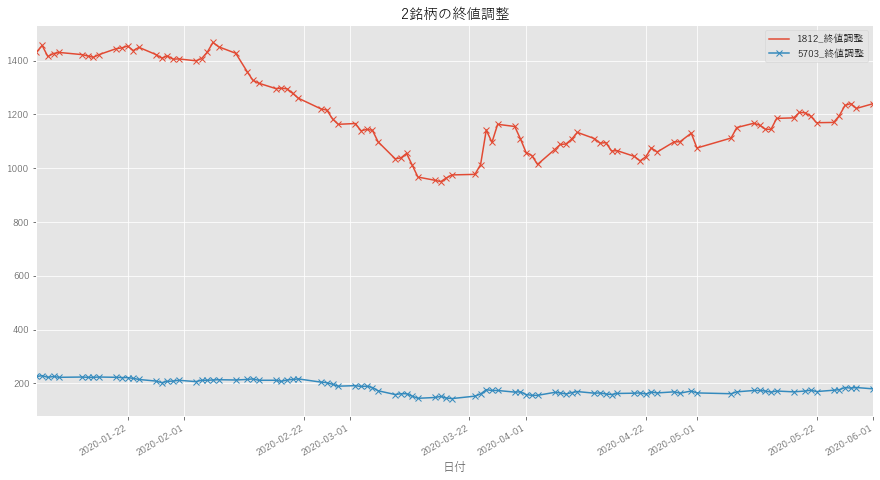

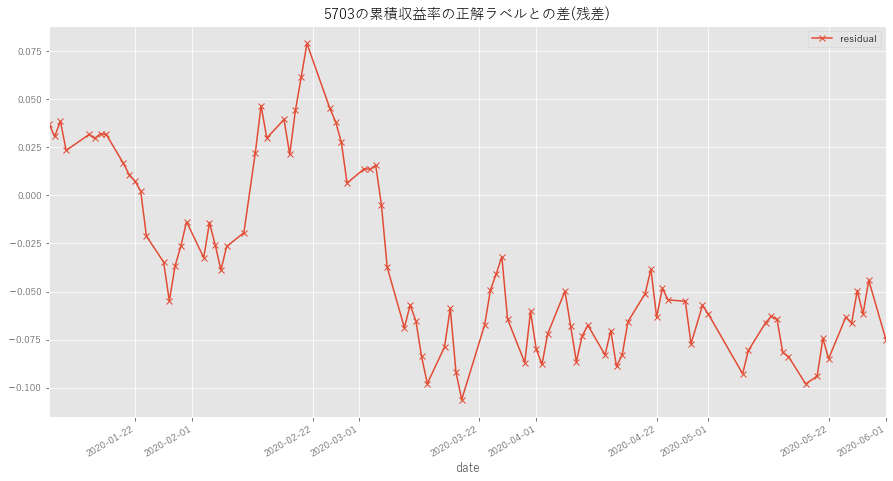

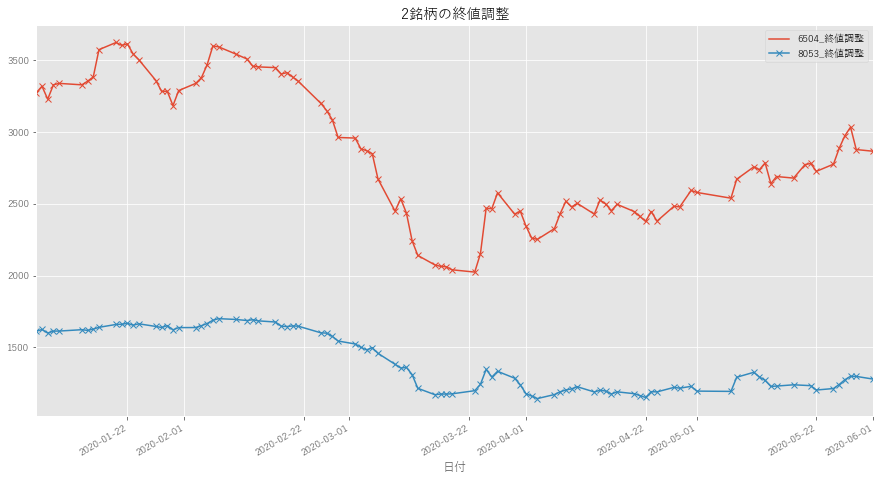

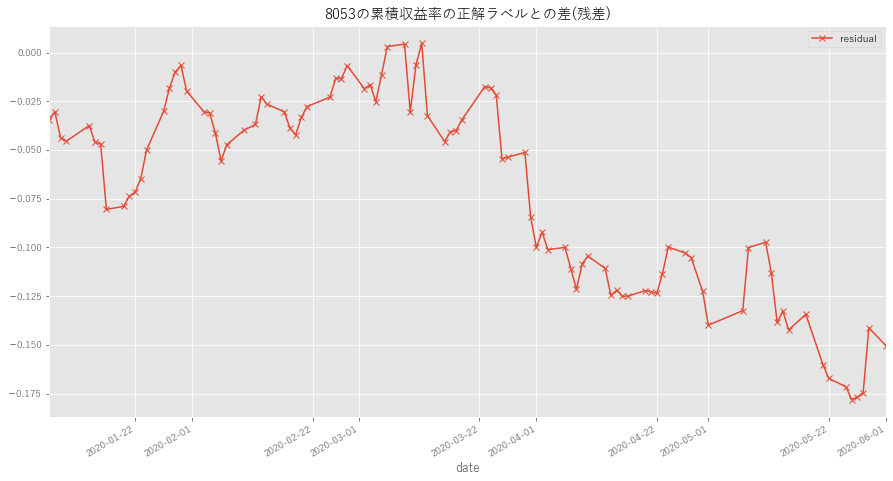

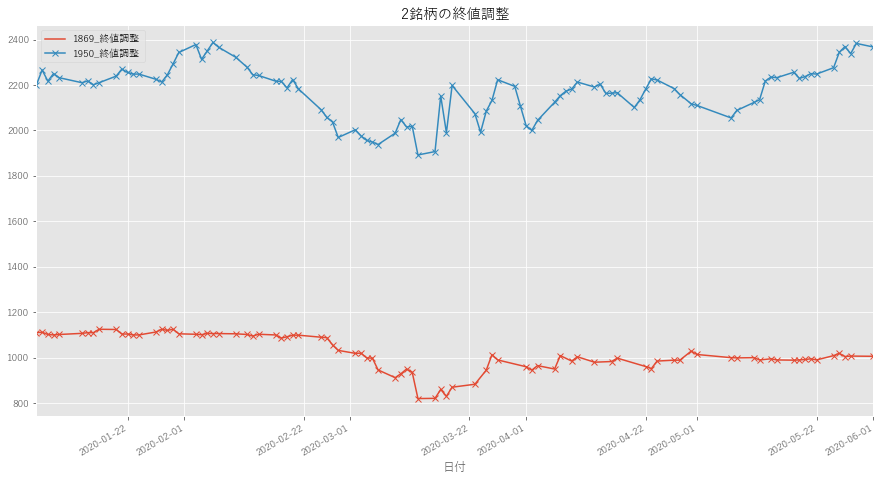

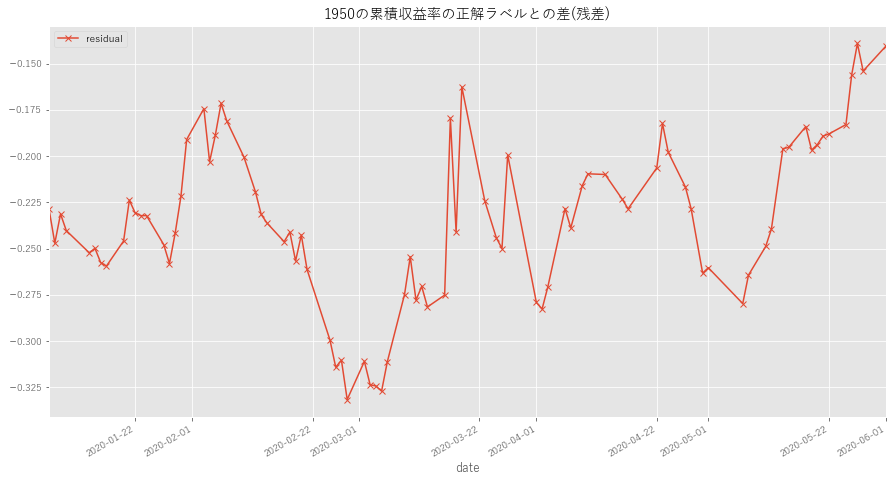

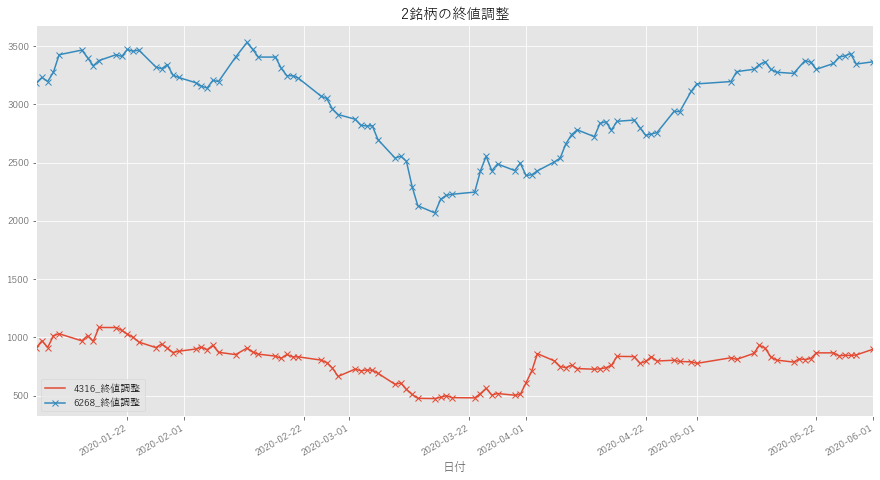

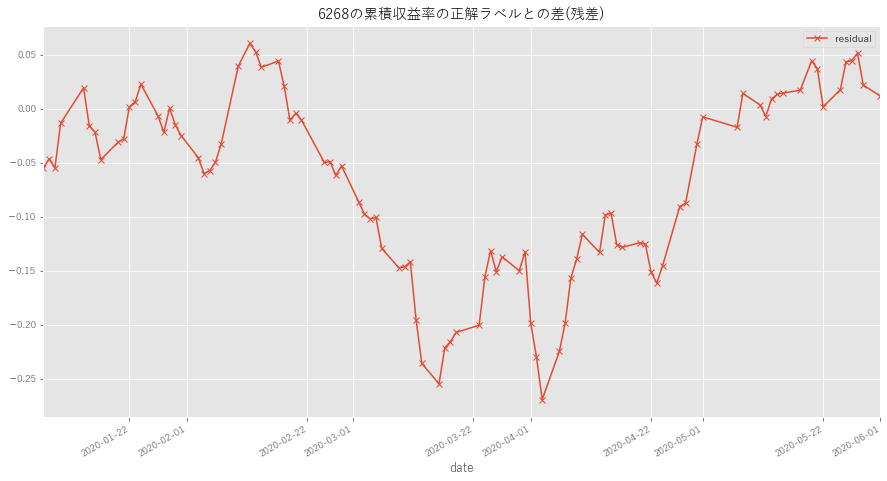

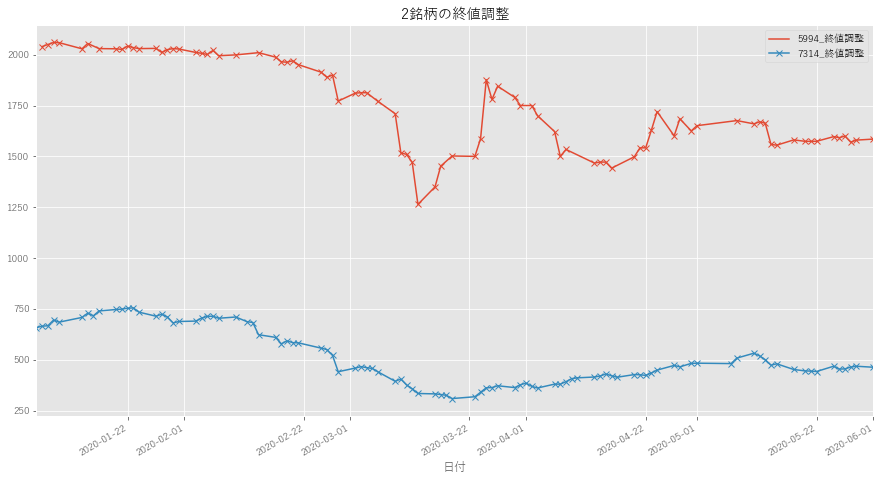

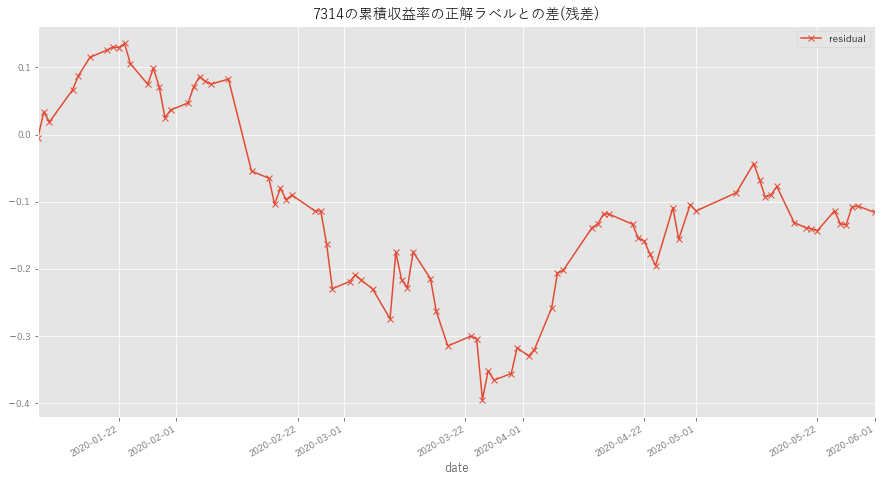

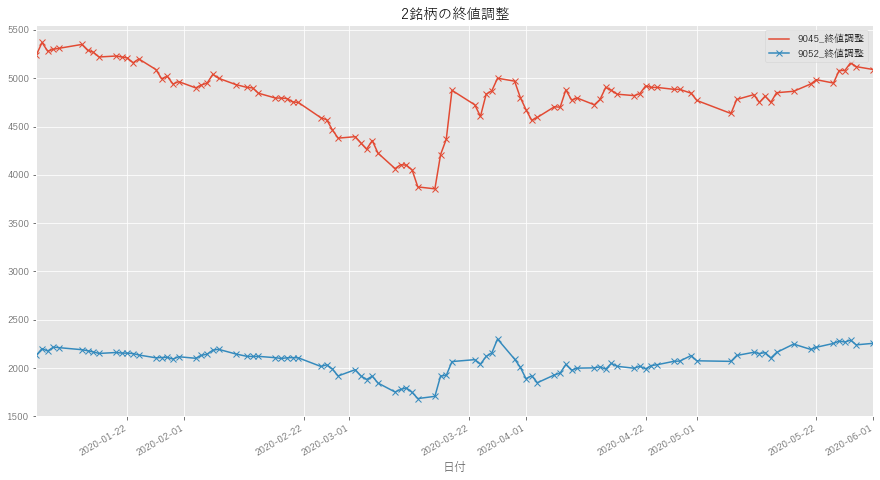

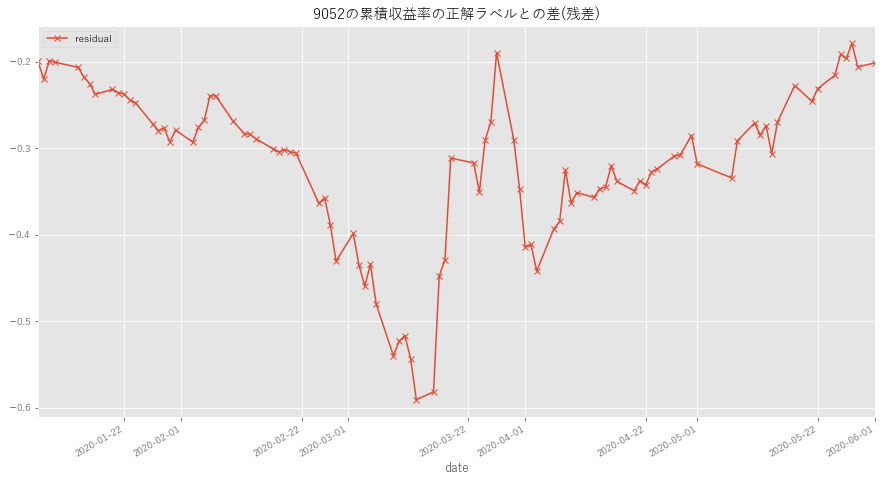

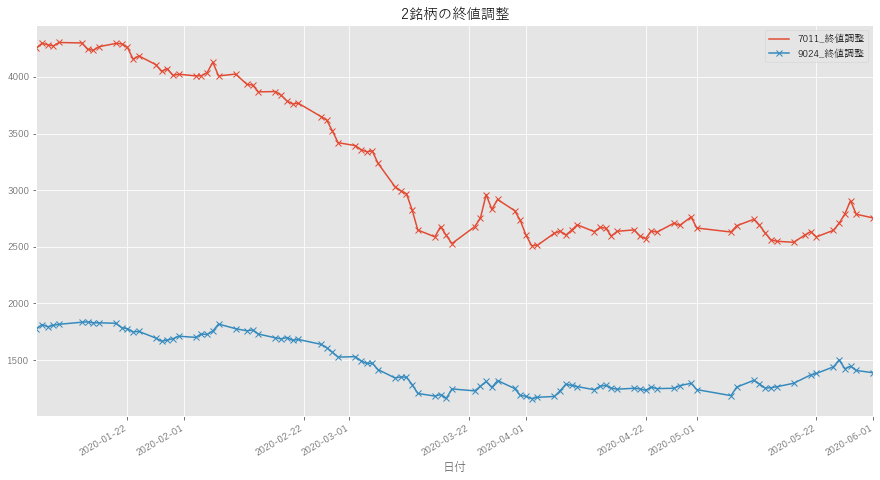

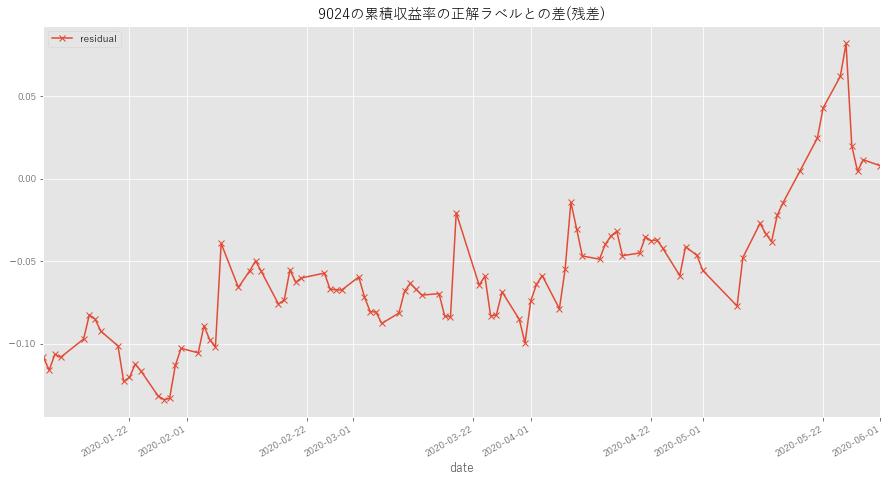

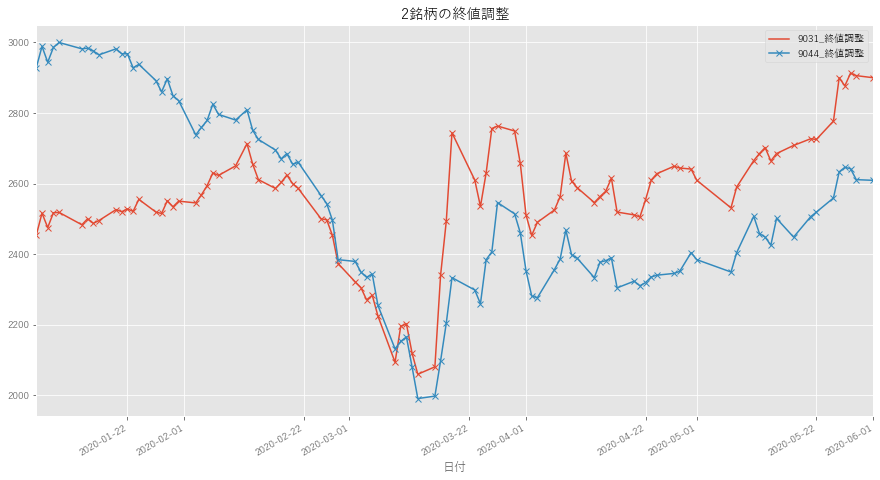

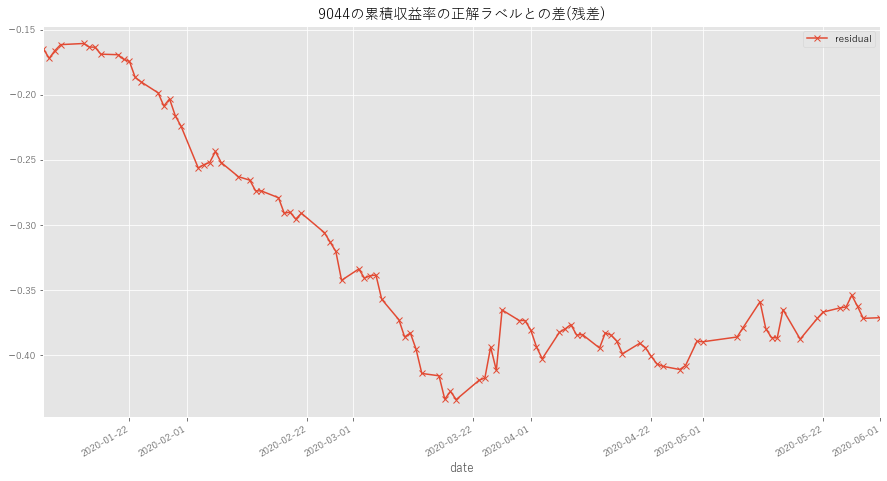

In [6]:
names = ['Ｂｒ．ＨＤ', '第一建設', '大林組', '鹿島', '鉄建建設', '東鉄工', '南海辰村', '名工建', '五洋建', '北陸電工', '日リーテック', '日本電設', '双日', 'ビーマップ', 'スパンクリト', 'ジオスター', '日立金', '日製鋼', '日軽金ＨＤ', '住友電', 'ファインシン', 'ナブテスコ', '東洋エンジ', '住友精', '日精工', 'ＮＴＮ', '日立', '東芝', '三菱電', '富士電機', '東洋電', '明電舎', 'ＦＣＨＤ', 'オムロン', '森尾電', '不二電機', '信号', '京三', '大同信', 'タムラ', '共和電', '双信電機', '三菱重', '川重', 'ＩＨＩ', '日車両', '近畿車', 'レシップＨＤ', 'ブレーキ', '小田原機器', 'ヤシマキザイ', '住友商', '三菱商', '東武', '相鉄ＨＤ', '東急', '京急', '小田急', '京王', '京成', '富士急', '秩父鉄', '新京成', 'ＪＲ東日本', 'ＪＲ西日本', 'ＪＲ東海', '西武ＨＤ', '西鉄', '近鉄ＧＨＤ', '阪急阪神', '南海電', '京阪ＨＤ', '神電鉄', '名鉄', '京福電', '山陽電', 'ＪＲ九州']
codes = [1726, 1799, 1802, 1812, 1815, 1835, 1850, 1869, 1893, 1930, 1938, 1950, 2768, 4316, 5277, 5282, 5486, 5631, 5703, 5802, 5994, 6268, 6330, 6355, 6471, 6472, 6501, 6502, 6503, 6504, 6505, 6508, 6542, 6645, 6647, 6654, 6741, 6742, 6743, 6768, 6853, 6938, 7011, 7012, 7013, 7102, 7122, 7213, 7238, 7314, 7677, 8053, 8058, 9001, 9003, 9005, 9006, 9007, 9008, 9009, 9010, 9012, 9014, 9020, 9021, 9022, 9024, 9031, 9041, 9042, 9044, 9045, 9046, 9048, 9049, 9052, 9142]
pair_trade.search_pair_trade(data_dir, codes, names, output_dir, 
                             p_threshold=0.05, 
                             train_start_date='2015-01-01')

## 医薬品銘柄一覧について
- https://jp.kabumap.com/servlets/kabumap/Action?SRC=stockList/base&chart=marketIndustry&code=%32%33%38&name=%1b%24%42%30%65%4c%74%49%4a%1b%28%42

70it [01:23,  1.19s/it]


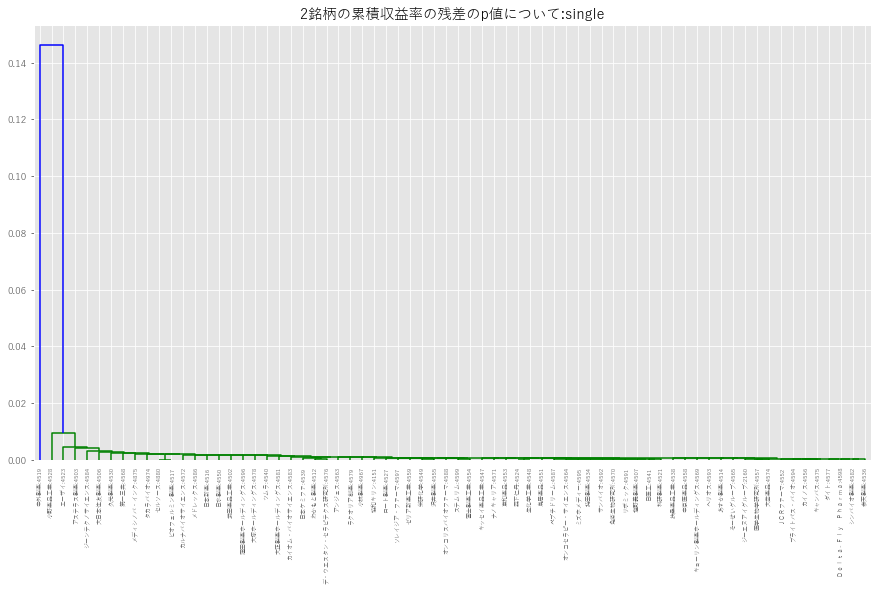

df_pair:
     index1  index2  distance  date_count    index1_name  \
0     19.0    27.0  0.000002         2.0     セルソース:4880   
1      6.0    33.0  0.000006         2.0      森下仁丹:4524   
2     36.0    50.0  0.000026         2.0       日医工:4541   
3     14.0    60.0  0.000029         2.0   シンバイオ製薬:4582   
5     21.0    40.0  0.000079         2.0  医学生物学研究所:4557   
7      0.0     1.0  0.000115         2.0      カイノス:4556   
19    29.0    31.0  0.000277         2.0     ステムリム:4599   
20    35.0    49.0  0.000281         2.0      栄研化学:4549   
23     8.0    11.0  0.000370         2.0    わかもと製薬:4512   

               index2_name  
0           ビオフェルミン製薬:4517  
1               生化学工業:4548  
2                科研製薬:4521  
3                参天製薬:4536  
5                大幸薬品:4574  
7               キャンバス:4575  
19             富士製薬工業:4554  
20               沢井製薬:4555  
23  デ・ウエスタン・セラピテクス研究所:4576  


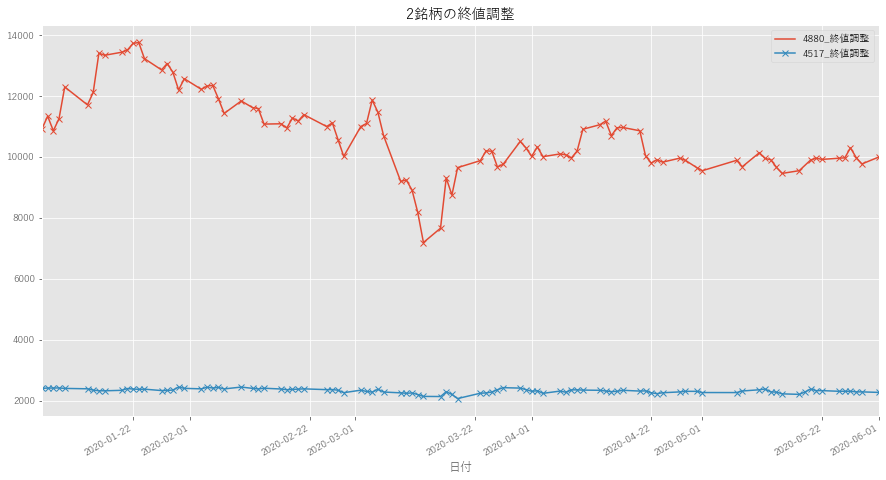

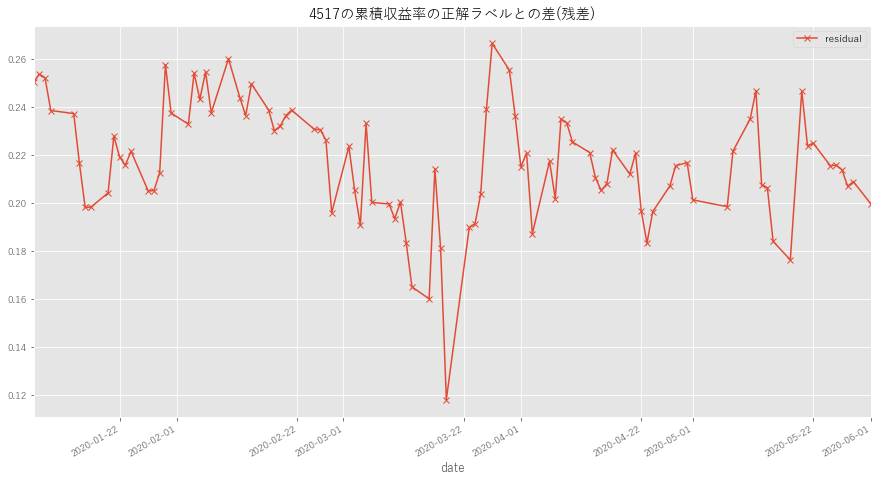

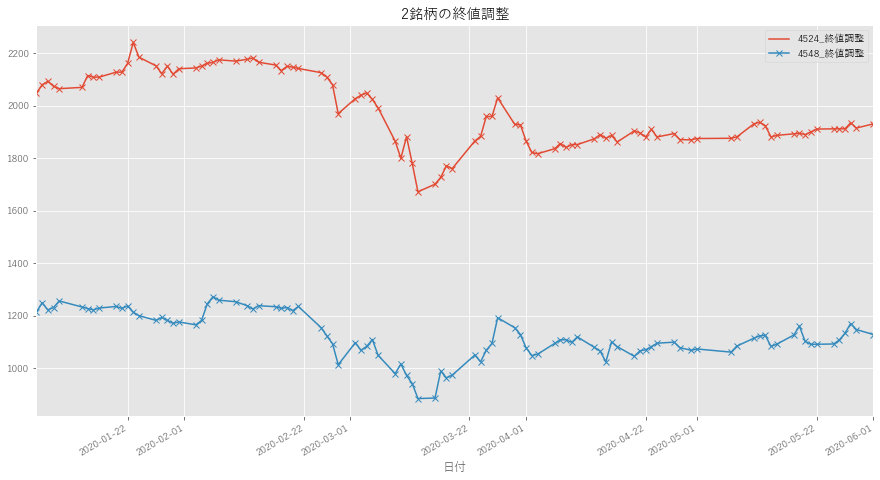

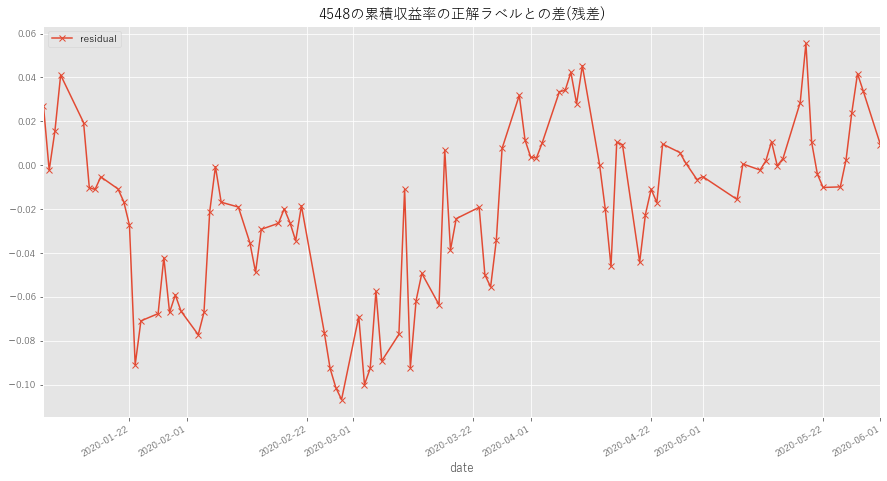

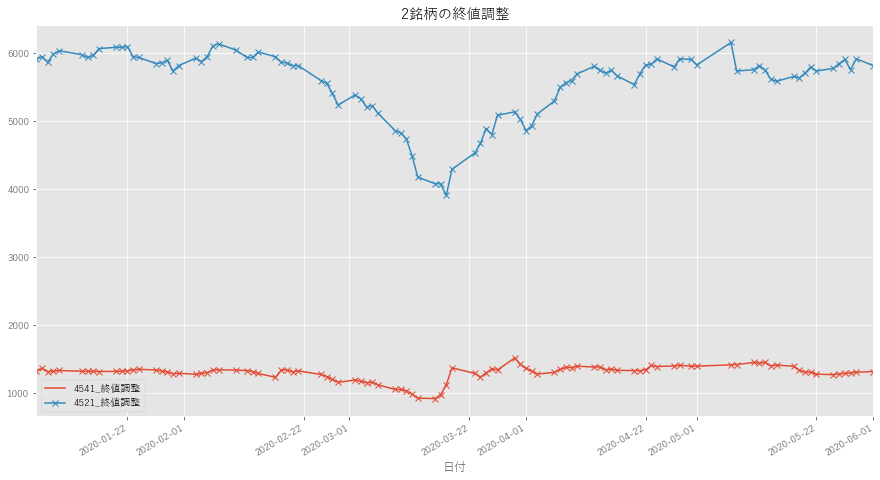

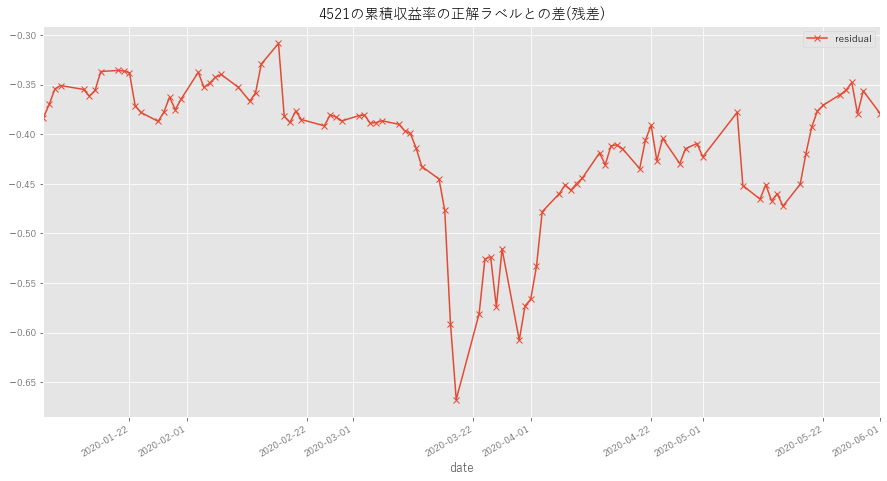

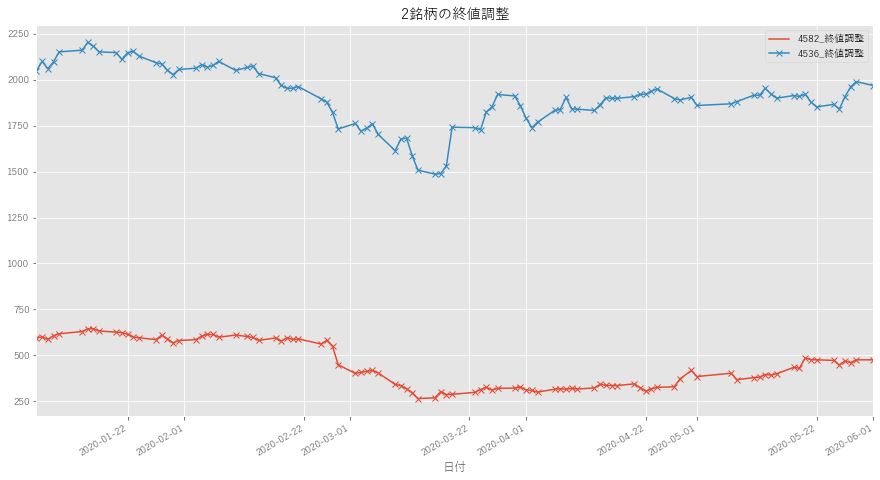

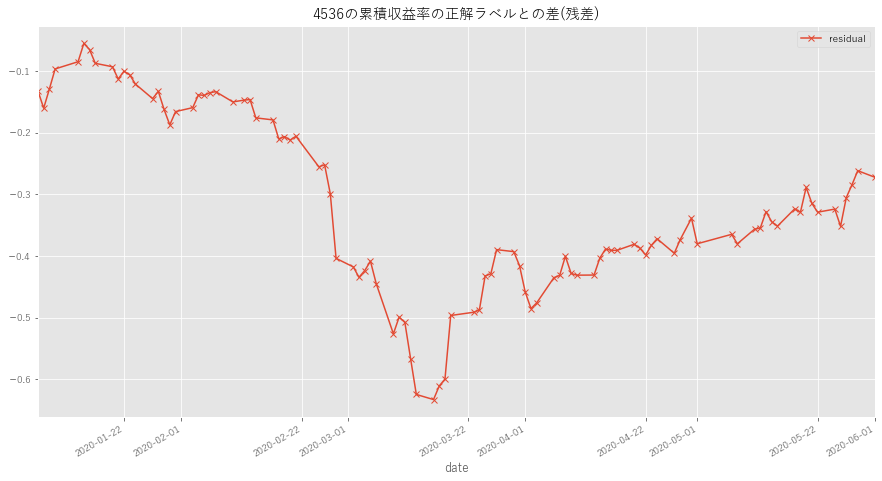

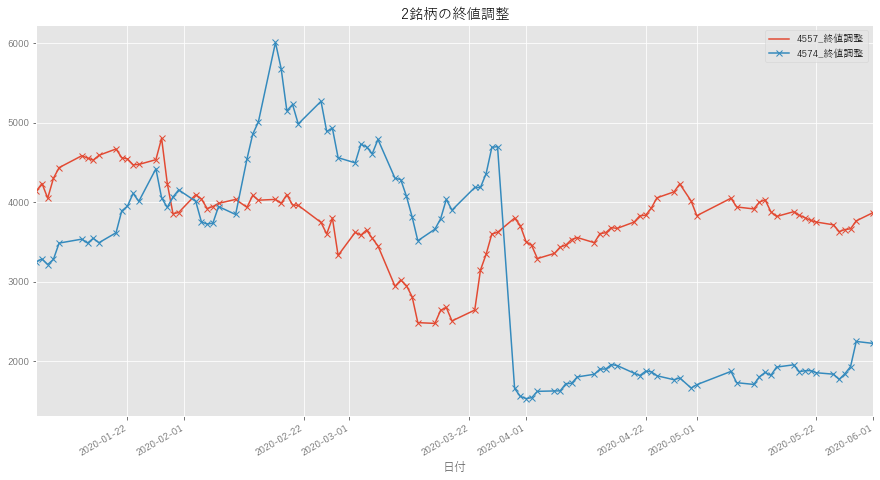

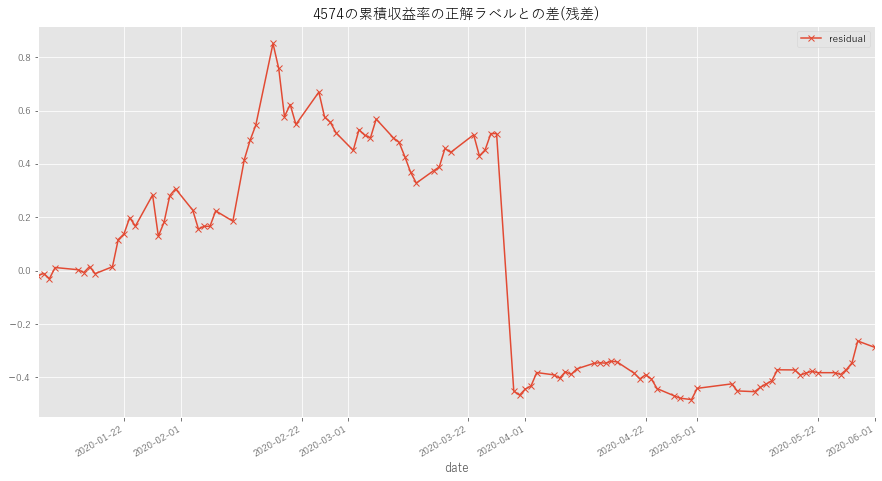

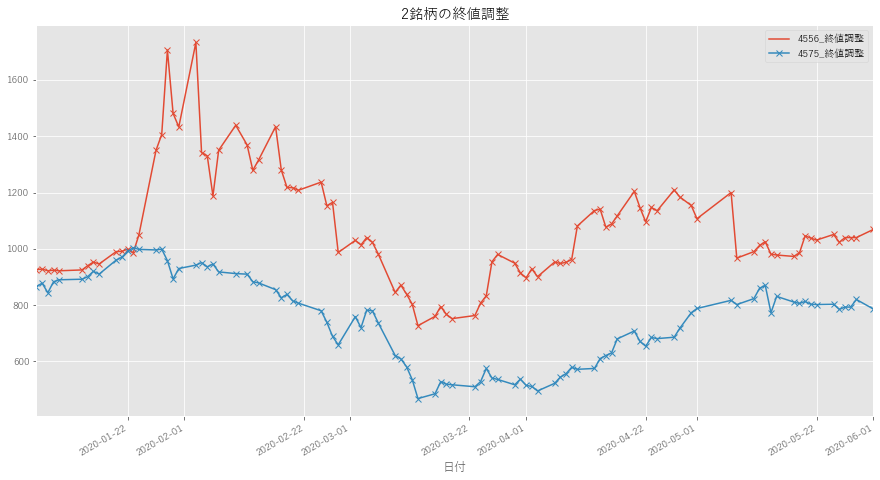

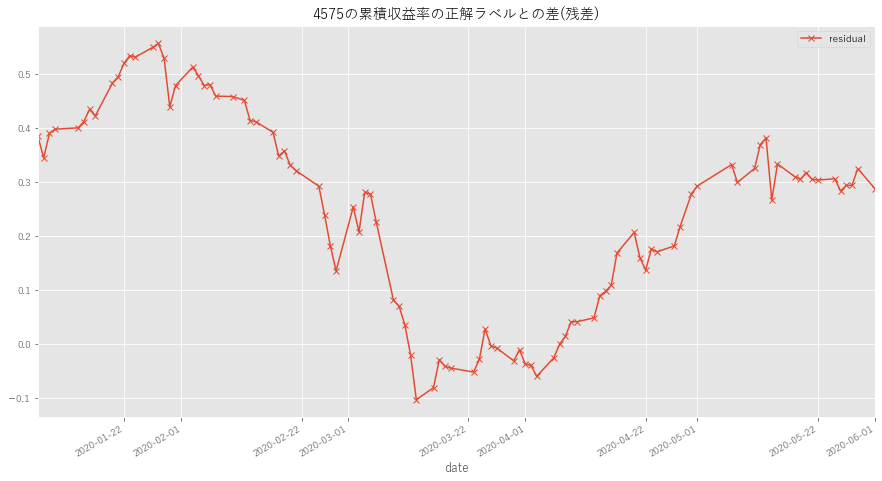

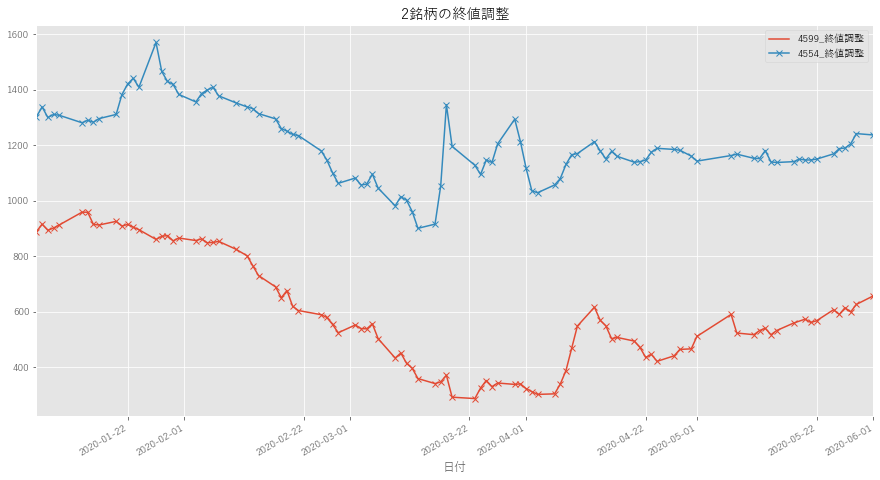

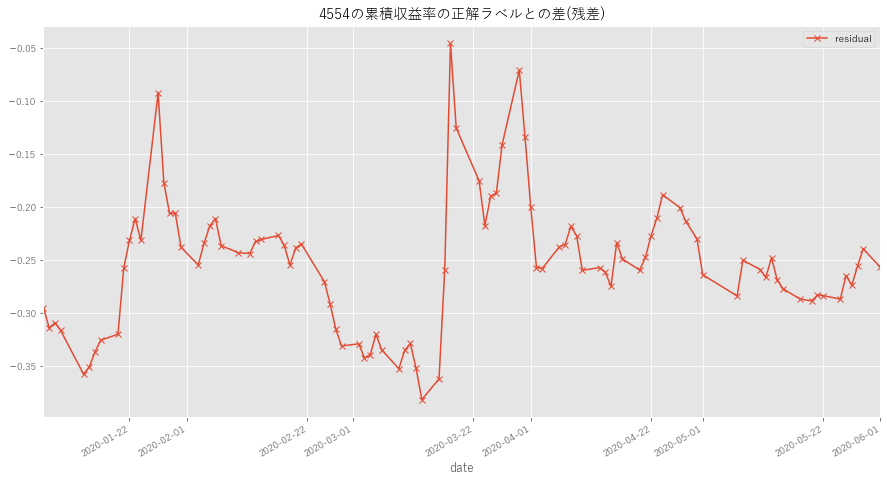

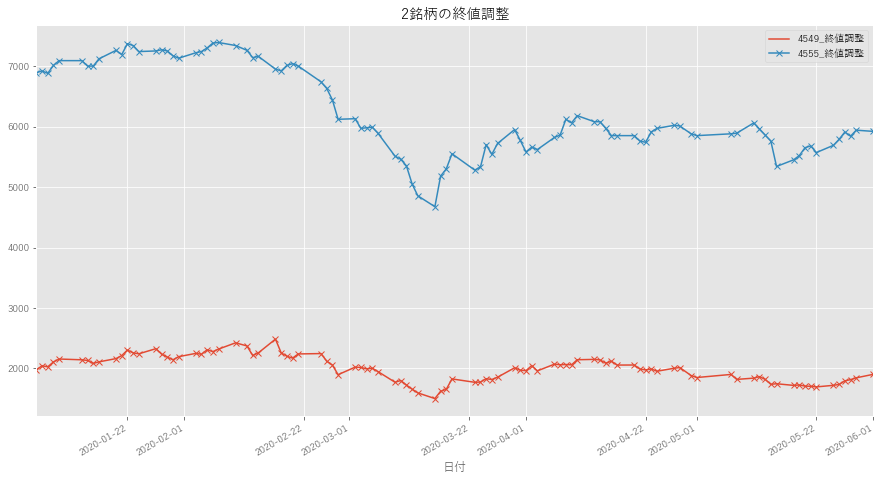

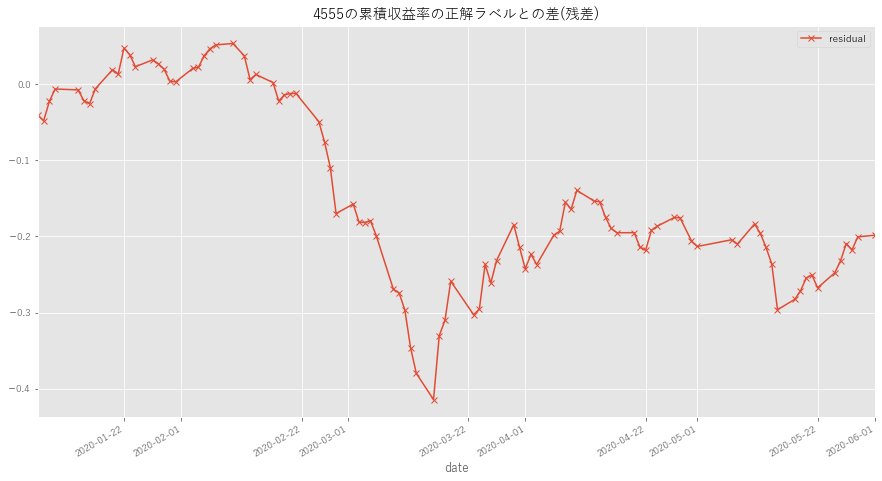

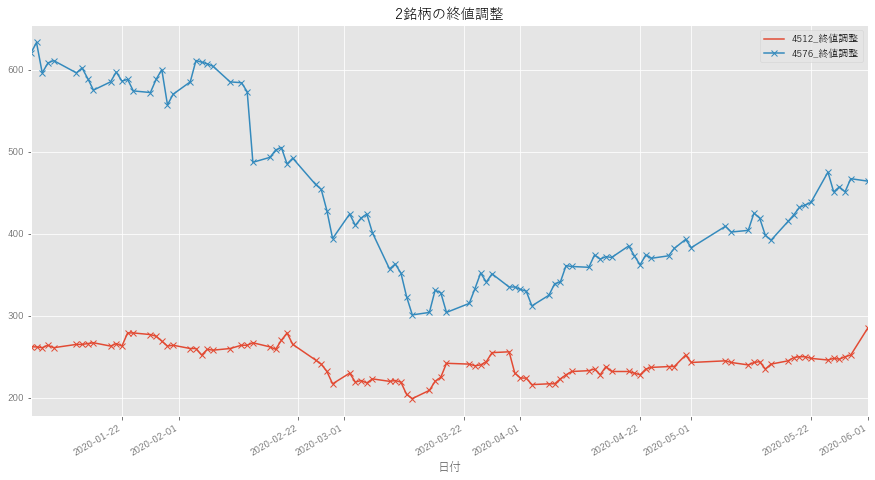

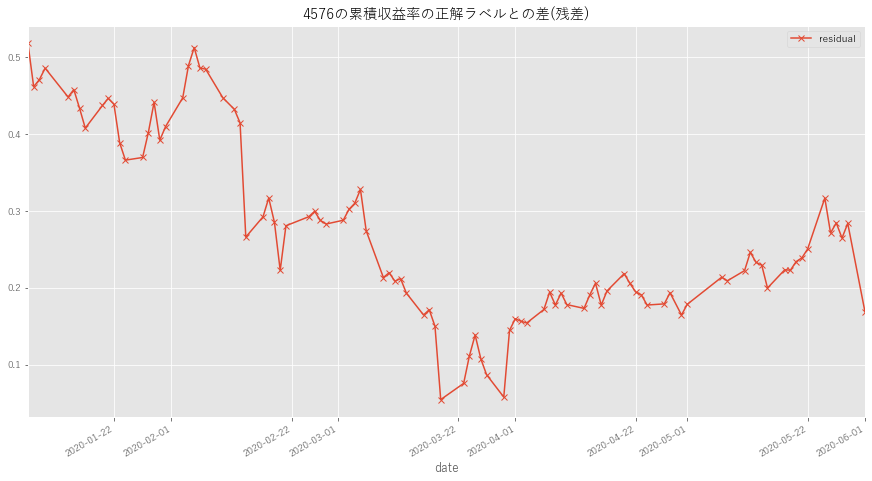

In [7]:
names = ['カイノス', 'キャンバス', '中京医薬品', '免疫生物研究所', 'メドレックス', 'Ｄｅｌｔａ- Ｆｌｙ　Ｐｈａｒｍａ', '森下仁丹', 'リボミック', 'わかもと製薬', 'ブライトパス・バイオ', '日本ケミファ', 'デ・ウエスタン・セラピテクス研究所', '窪田製薬ホールディングス', 'カイオム・バイオサイエンス', 'シンバイオ製薬', 'ミズホメディー', 'ジーンテクノサイエンス', 'ソレイジア・ファーマ', 'ナノキャリア', 'セルソース', 'カルナバイオサイエンス', '医学生物学研究所', 'オンコセラピー・サイエンス', 'ラクオリア創薬', 'オンコリスバイオファーマ', '扶桑薬品工業', 'メディシノバ・インク', 'ビオフェルミン製薬', '日水製薬', 'ステムリム', 'あすか製薬', '富士製薬工業', 'ダイト', '生化学工業', 'ジーエヌアイグループ', '栄研化学', '日医工', 'サンバイオ', '鳥居薬品', 'ヘリオス', '大幸薬品', 'ゼリア新薬工業', '東和薬品', 'そーせいグループ', 'キッセイ薬品工業', 'キョーリン製薬ホールディングス', '持田製薬', 'ツムラ', 'アンジェス', '沢井製薬', '科研製薬', 'タカラバイオ', 'ロート製薬', 'ＪＣＲファーマ', '久光製薬', '大正製薬ホールディングス', '大日本住友製薬', 'ペプチドリーム', '日本新薬', '小林製薬', '参天製薬', '協和キリン', '小野薬品工業', '塩野義製薬', 'エーザイ', '大塚ホールディングス', 'アステラス製薬', '武田薬品工業', '第一三共', '中外製薬']
codes = [4556, 4575, 4558, 4570, 4586, 4598, 4524, 4591, 4512, 4594, 4539, 4576, 4596, 4583, 4582, 4595, 4584, 4597, 4571, 4880, 4572, 4557, 4564, 4579, 4588, 4538, 4875, 4517, 4550, 4599, 4514, 4554, 4577, 4548, 2160, 4549, 4541, 4592, 4551, 4593, 4574, 4559, 4553, 4565, 4547, 4569, 4534, 4540, 4563, 4555, 4521, 4974, 4527, 4552, 4530, 4581, 4506, 4587, 4516, 4967, 4536, 4151, 4528, 4507, 4523, 4578, 4503, 4502, 4568, 4519]
pair_trade.search_pair_trade(data_dir, codes, names, output_dir, 
                             p_threshold=0.01, 
                             train_start_date='2015-01-01')

## デジタルトランスフォーメーション（DX）関連が株式テーマの銘柄について
- https://kabutan.jp/themes/?theme=%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E3%83%88%E3%83%A9%E3%83%B3%E3%82%B9%E3%83%95%E3%82%A9%E3%83%BC%E3%83%A1%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3

37it [00:27,  1.35it/s]


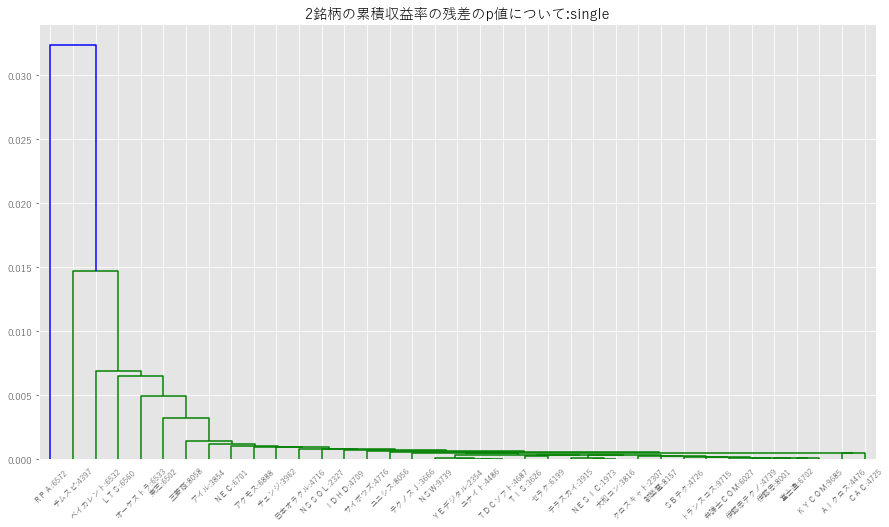

df_pair:
     index1  index2      distance  date_count index1_name  index2_name
0      0.0     6.0  1.208931e-08         2.0  ＮＥＳＩＣ:1973    大和コン:3816
1     12.0    13.0  2.805426e-08         2.0   ユナイト:4486  ＴＤＣソフト:4687
5     28.0    34.0  9.089618e-05         2.0    富士通:6702   ＫＹＣＯＭ:9685
13     4.0    21.0  2.841014e-04         2.0    ＴＩＳ:3626     セラク:6199
18    11.0    16.0  4.923757e-04         2.0  ＡＩクロス:4476     ＣＡＣ:4725


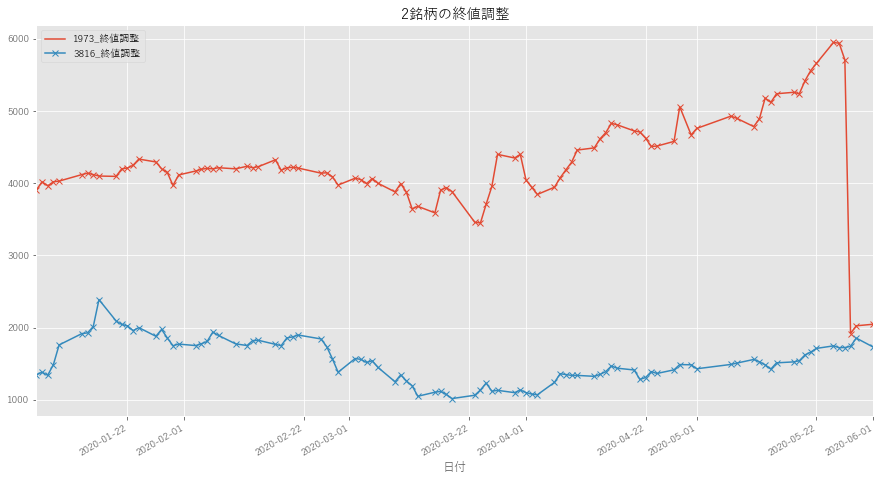

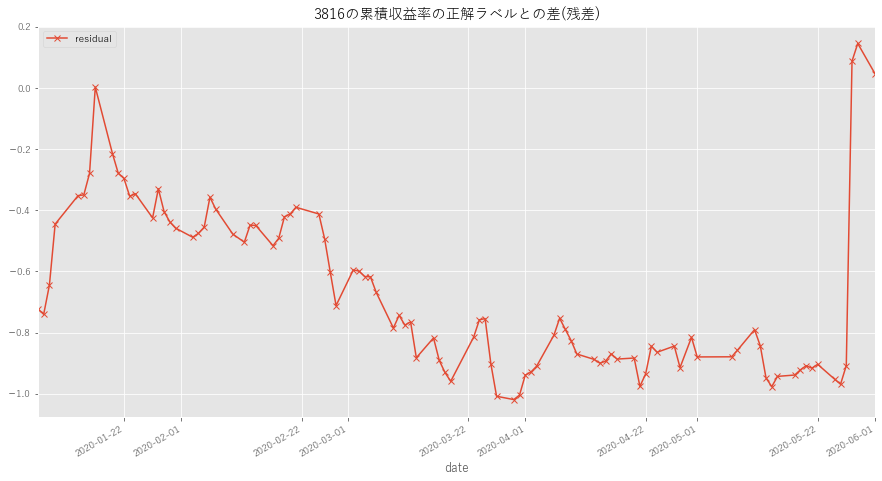

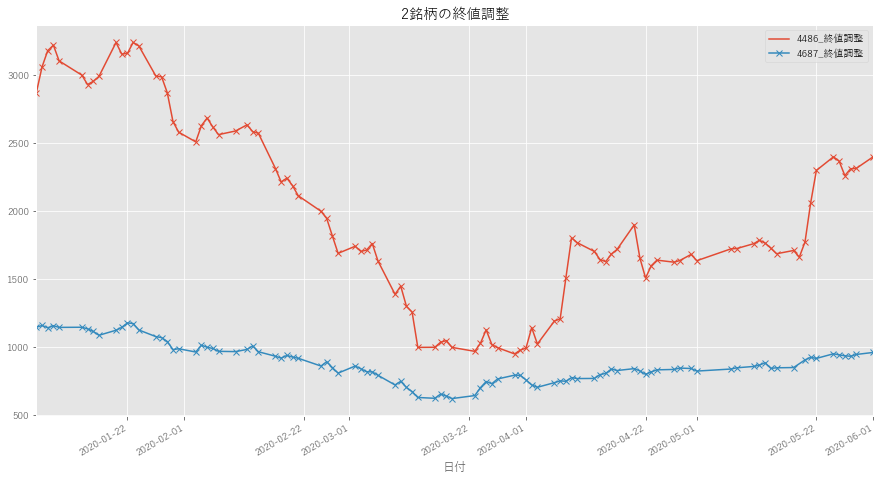

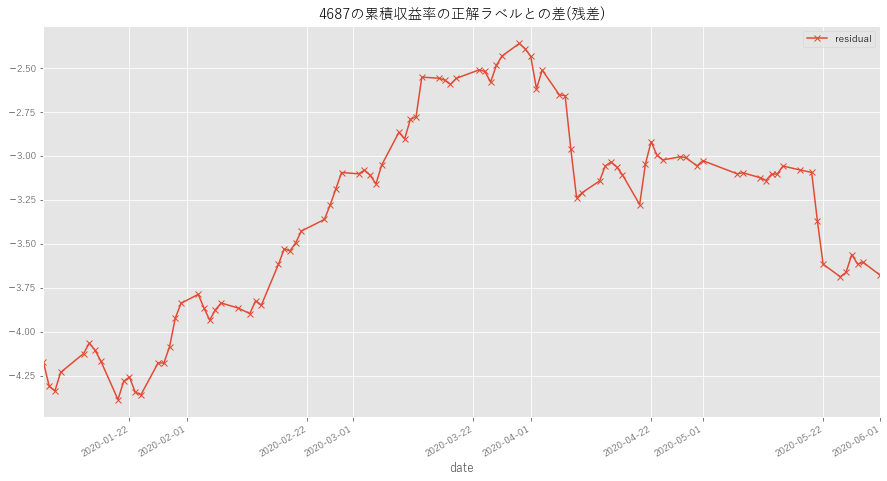

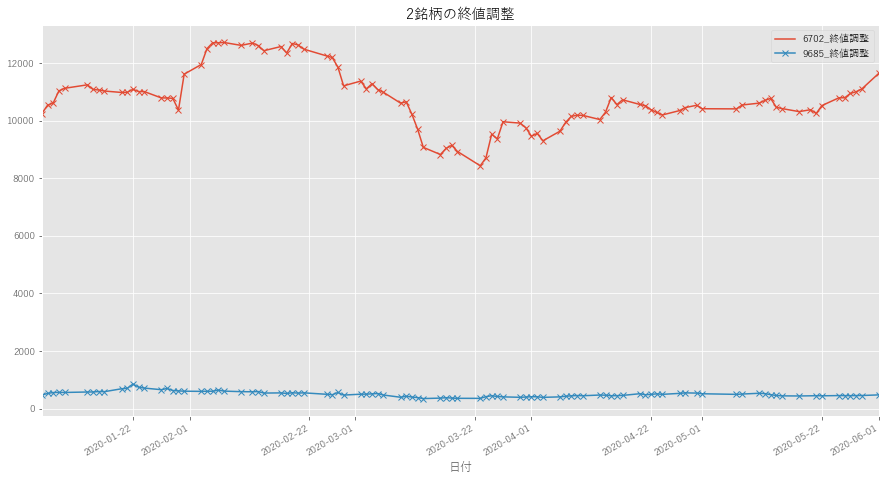

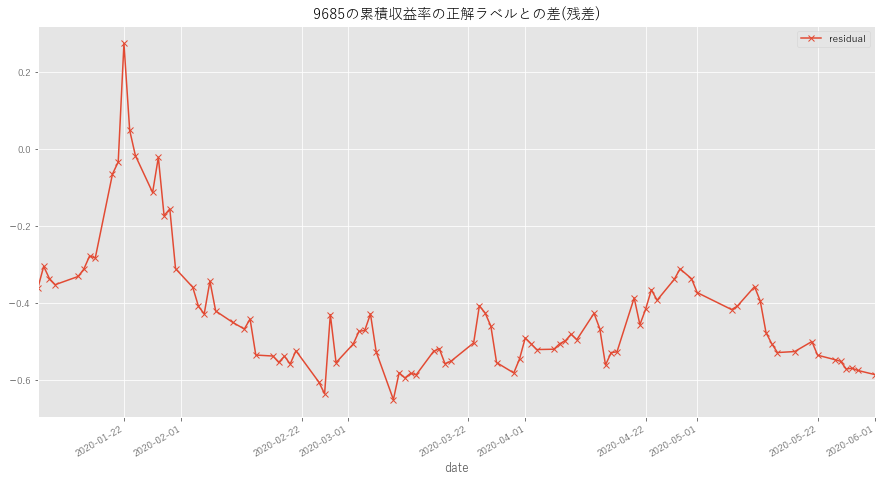

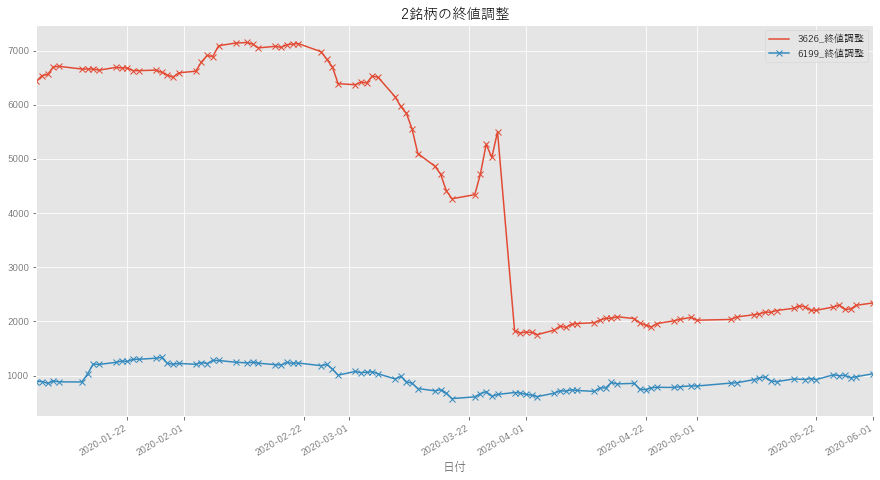

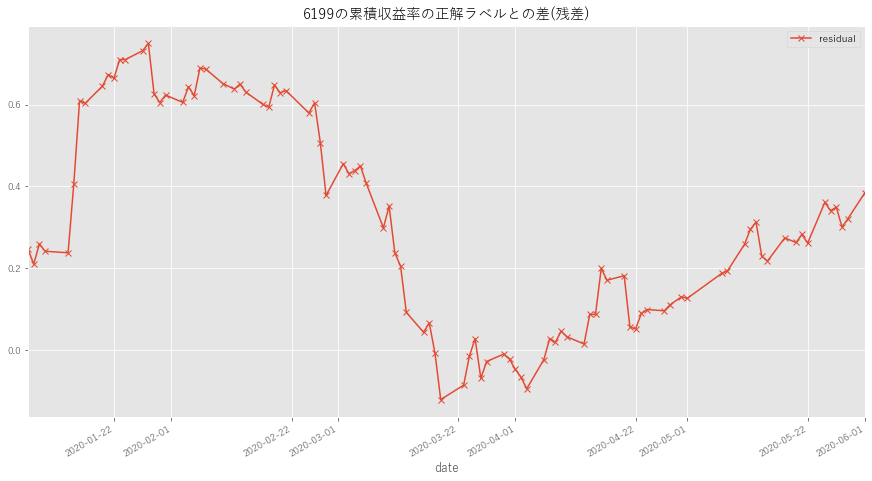

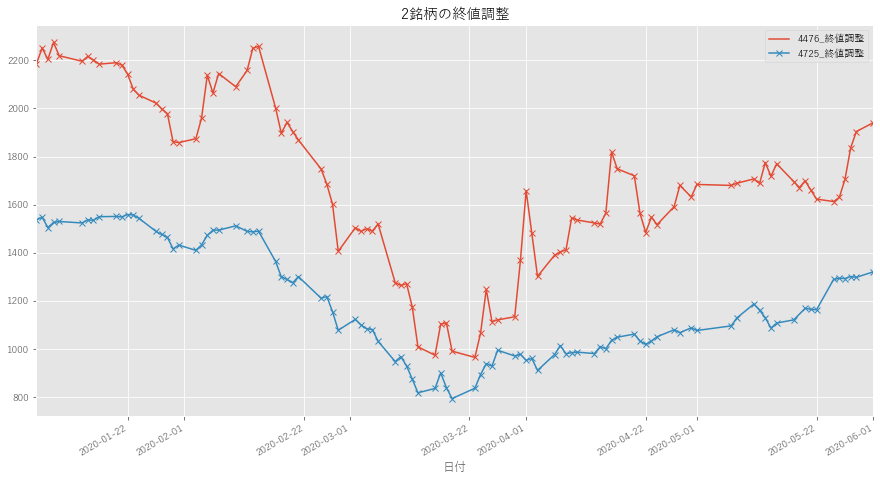

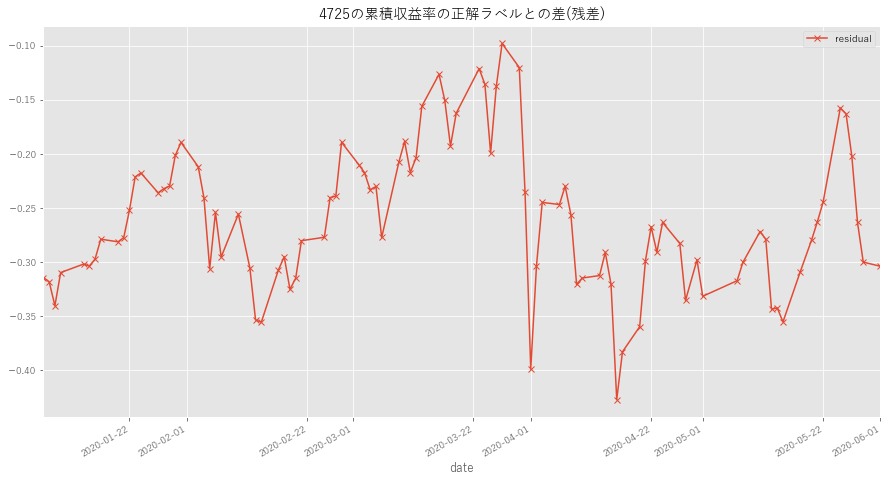

In [8]:
names = ['ＮＥＳＩＣ', 'クロスキャト', 'ＮＳＳＯＬ', 'ＹＥデジタル', 'ＴＩＳ', 'テクノスＪ', '大和コン', 'アイル', 'テラスカイ', 'チェンジ', 'チムスピ', 'ＡＩクロス', 'ユナイト', 'ＴＤＣソフト', 'ＩＤＨＤ', '日本オラクル', 'ＣＡＣ', 'ＳＢテク', '伊藤忠テクノ', 'サイボウズ', '弁護士ＣＯＭ', 'セラク', '東芝', 'ベイカレント', 'オーケストラ', 'ＬＴＳ', 'ＲＰＡ', 'ＮＥＣ', '富士通', 'アクモス', '伊藤忠', 'ユニシス', '三菱商', '都築電', 'ＫＹＣＯＭ', 'トランスコス', 'ＮＳＷ']
codes = [1973, 2307, 2327, 2354, 3626, 3666, 3816, 3854, 3915, 3962, 4397, 4476, 4486, 4687, 4709, 4716, 4725, 4726, 4739, 4776, 6027, 6199, 6502, 6532, 6533, 6560, 6572, 6701, 6702, 6888, 8001, 8056, 8058, 8157, 9685, 9715, 9739]
pair_trade.search_pair_trade(data_dir, codes, names, output_dir, 
                             p_threshold=0.01, 
                             train_start_date='2015-01-01')